### Parcialito 2 - Federico del Mazo - 100029

In [1]:
import networkx as nx
import pandas as pd

df = pd.read_csv('../Shared/World.csv', header=0, names=["source", "target", "_weight"])
Graphtype = nx.Graph()
G = nx.from_pandas_edgelist(df, create_using=Graphtype)

#### Ejercicio 1

- Obtener una visualización de las comunidades presentes en dicha red (indicando el algoritmo utilizado).
- Considerando lo que respondiste en el parcialito 1 (ejercicio 2):
  - Si mencionaste que había homofilia, ¿corresponde por el mismo tipo que mencionaste anteriormente? ¿por
qué?
  - ~~Si mencionaste que no había homofilia (o bien no realizaste el ejercicio), ¿qué tipo de homofilia se puede ver presente?~~
- Obtener los nodos correspondientes a una de las subredes (con al menos 20% de los nodos), y realizar una
visualización de las sub-comunidades presentes.

In [2]:
from networkx.algorithms import community

louvain = community.louvain_communities(G)
print(f"Tengo {len(louvain)} comunidades detectadas con el método de Louvain")

Tengo 4 comunidades detectadas con el método de Louvain


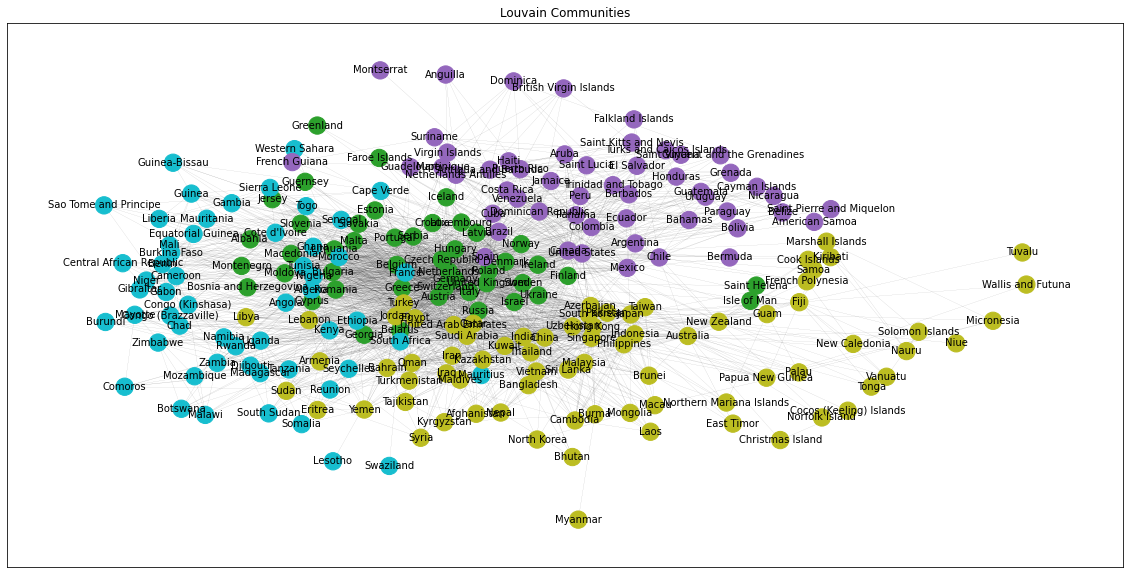

In [3]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random

plt.figure(figsize=(20,10))

draw_nodes = {}
colors = random.sample(list(mcolors.TABLEAU_COLORS), len(louvain))
for louvaincommunity, color in zip(louvain, colors):
    draw_nodes.update({n: color for n in louvaincommunity})
    
plt.title("Louvain Communities")
nx.draw_networkx(G, 
                 nodelist=draw_nodes.keys(), 
                 node_color=list(draw_nodes.values()), 
                 width=0.05, 
                 pos=nx.kamada_kawai_layout(G),
                 font_size=10)

In [4]:
# Quiero comparar mis comunidades contra la homofilia por continentes que encontré en el Parcialito1.
# Hago casi clavado copy-paste de la celda que mapea pais a continente en Parcialito1/parcialito-1.ipynb

df2 = pd.read_csv('../Shared/country_profile_variables.csv', header=0)
region_to_continent = {'SouthernAsia': 'Asia', 'SouthernEurope': 'Europe', 'NorthernAfrica': 'Africa', 'Polynesia': 'Oceania', 'MiddleAfrica': 'Africa', 'Caribbean': 'CentralAmerica', 'SouthAmerica': 'SouthAmerica', 'WesternAsia': 'Asia', 'Oceania': 'Oceania', 'WesternEurope': 'Europe', 'EasternEurope': 'Europe', 'CentralAmerica': 'CentralAmerica', 'WesternAfrica': 'Africa', 'NorthernAmerica': 'NorthernAmerica', 'SouthernAfrica': 'Africa', 'South-easternAsia': 'Asia', 'EasternAfrica': 'Africa', 'NorthernEurope': 'Europe', 'EasternAsia': 'Asia', 'Melanesia': 'Oceania', 'Micronesia': 'Oceania', 'CentralAsia': 'Asia'} 
df2['Continent'] = df2['Region'].map(region_to_continent)
aliases = {"United States of America": "United States", "Viet Nam": "Vietnam", "Bolivia (Plurinational State of)":"Bolivia", "China, Hong Kong SAR": "Hong Kong", "Micronesia (Federated States of)": "Micronesia", "Czechia": "Czech Republic", "Democratic People's Republic of Korea": "South Korea", "Russian Federation": "Russia", "The former Yugoslav Republic of Macedonia": "Macedonia", "Iran (Islamic Republic of)": "Iran", "Venezuela (Bolivarian Republic of)": "Venezuela", "Brunei Darussalam": "Brunei", "Falkland Islands (Malvinas)": "Falkland Islands", "Syrian Arab Republic": "Syria", "Wallis and Futuna Islands": "Wallis and Futuna", "Republic of Korea": "North Korea", "United Republic of Tanzania": "Tanzania"}
df2 = df2[['country', 'Continent']]
df2 = df2.set_index('country').rename(index = aliases)
attributes = df2.to_dict('index')
attributes
nx.set_node_attributes(G, attributes)

manual_attributes = {'Taiwan': 'Asia', 'Netherlands Antilles': 'Europe', "Cote d'Ivoire": 'Africa', 'Congo (Brazzaville)': 'Africa', 'Congo (Kinshasa)': 'Africa', 'Cape Verde': 'Africa', 'Moldova': 'Europe', 'Guernsey': 'Europe', 'Jersey': 'Europe', 'Reunion': 'Europe', 'Virgin Islands': 'CentralAmerica', 'Norfolk Island': 'Oceania', 'Burma': 'Asia', 'Macau': 'Asia', 'Laos': 'Asia', 'East Timor': 'Asia', 'Christmas Island': 'Asia', 'Cocos (Keeling) Islands': 'Asia'}
nx.set_node_attributes(G, {k: {'Continent': v} for k,v in manual_attributes.items()})

In [5]:
# De cada comunidad de Louvain que tengo... 
#   cuál es mi continente mayoritario? cuantos paises no estan dentro de ese continente?

from collections import Counter

continent_count = Counter(nx.get_node_attributes(G, 'Continent'))
for i, louvaincommunity in enumerate(louvain):
    community_count = {k: v for k,v in continent_count.items() if k in louvaincommunity}
    continents = list(community_count.values())
    majority = max(continents, key=continents.count)
    majority_percent = (len([v for k, v in community_count.items() if v == majority]) / len(louvaincommunity)) * 100
    print(f"La comunidad #{i} tiene {len(louvaincommunity)} paises y consiste de un {majority_percent:.2f}% de paises de {majority}.")

La comunidad #0 tiene 46 paises y consiste de un 89.13% de paises de Europe.
La comunidad #1 tiene 55 paises y consiste de un 94.55% de paises de Africa.
La comunidad #2 tiene 52 paises y consiste de un 59.62% de paises de CentralAmerica.
La comunidad #3 tiene 76 paises y consiste de un 65.79% de paises de Asia.


**_Qué podemos decir de todo esto?_**

Claramente los continentes de Europa y Africa se convirtieron en su propia comunidad. Esto muestra que sus paises son bastante similares y cercanos entre sí. De las otras dos comunidades formadas no se puede decir lo mismo con tanta certeza, pero aún así el tener más de la mitad de los paises del mismo continente en ambas comunidades demuestra que aunque sea *algo* de homofilia había.

En conclusión, si, yo creo que las comunidades formadas corresponden al tipo de homofilia por continente, planteada en el parcialito anterior.

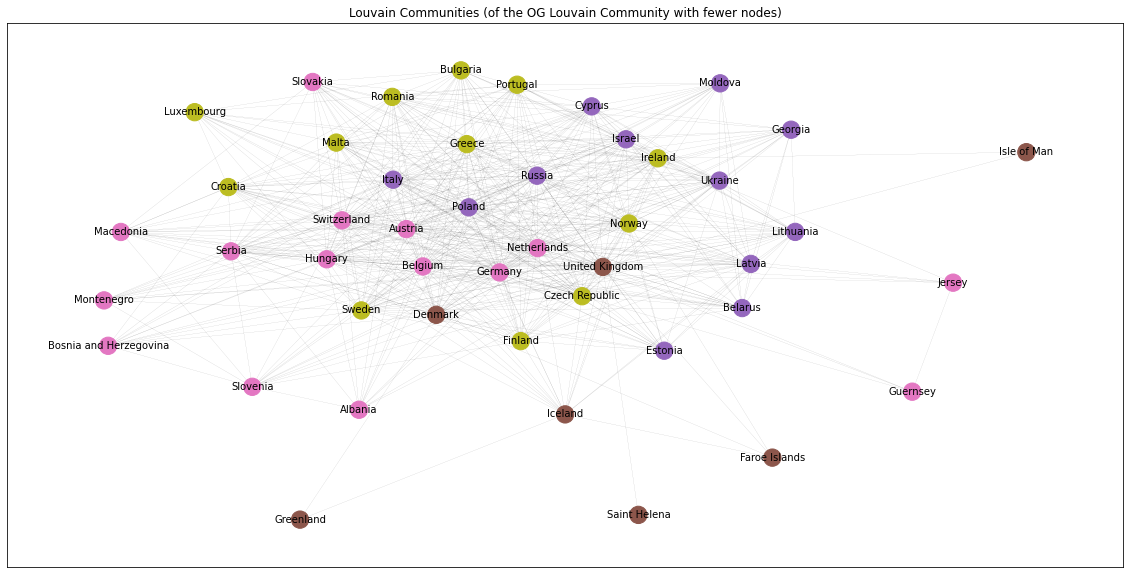

In [6]:
# Mostremos las subcomunidades de mi comunidad más chica
subnetwork = nx.subgraph(G, min(louvain, key=len))
subnetwork_louvain = community.louvain_communities(subnetwork)
plt.figure(figsize=(20,10))

draw_nodes = {}
colors = random.sample(list(mcolors.TABLEAU_COLORS), len(subnetwork_louvain))
for louvain, color in zip(subnetwork_louvain, colors):
    draw_nodes.update({n: color for n in louvain})
    
plt.title("Louvain Communities (of the OG Louvain Community with fewer nodes)")
nx.draw_networkx(subnetwork, 
                 nodelist=draw_nodes.keys(), 
                 node_color=list(draw_nodes.values()), 
                 width=0.05, 
                 pos=nx.kamada_kawai_layout(subnetwork),
                 font_size=10)

#### Ejercicio 2

- Calcular los motifs de hasta 5 nodos de la subred definida en el punto 1.c.
- Calcular el promedio y desvío estandar de los motifs de una red de baseline. Calcular el significant profile de la red, y hacer un gráfico.
- Intentar dar con una explicación del resultado obtenido en el punto anterior

Sample de los 29 patrones de hasta 5 nodos que vamos a buscar


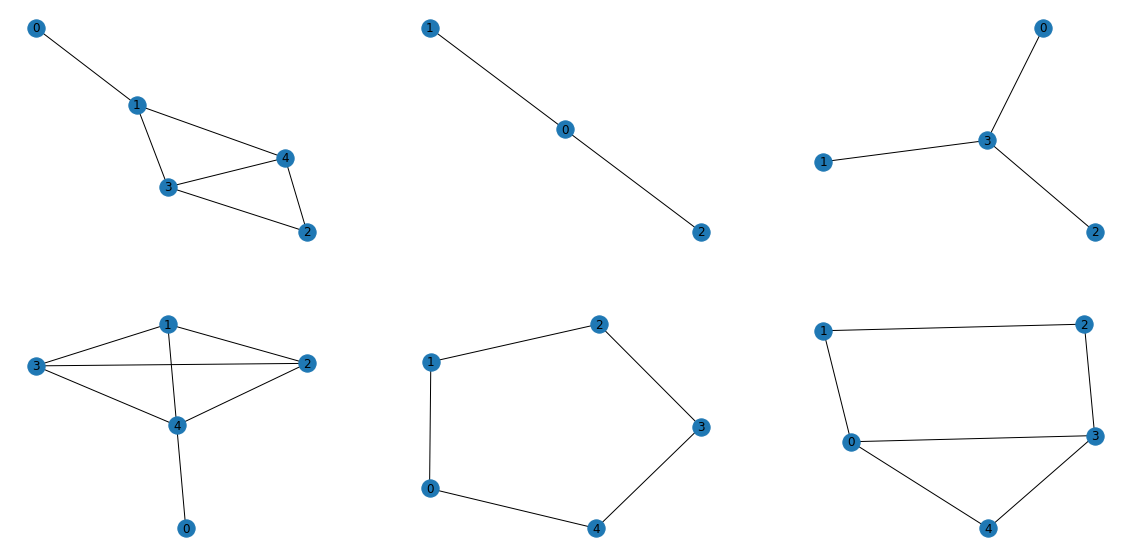

In [7]:
# Agarremos todos los grafos de N nodos del graph atlas, que los tiene todos ordenaditos y lindos
#   https://igraph.org/r/doc/graph_from_atlas.html

NODOS_MOTIF = [3, 4, 5]

# Esta lista no es de 'motifs', es de 'posibles motifs' (patrones).
# Cuando veamos el SP de cada uno de estos, vamos a saber si efectivamente son un motif o no
# Pero queda mas lindo nombrar a la variable motif
motifs = [subg for subg in nx.graph_atlas_g() if len(subg) in NODOS_MOTIF and nx.is_connected(subg)] 

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
ax = axes.flatten()

print(f"Sample de los {len(motifs)} patrones de hasta {max(NODOS_MOTIF)} nodos que vamos a buscar")
for i, subg in enumerate(random.sample(motifs, len(ax))):
    nx.draw_networkx(subg, ax=ax[i])
    ax[i].set_axis_off()

plt.show()

In [8]:
import itertools

# Inicialicemos un diccionario de apariciones de cada motif. {degree_seq: contador}
def degree_seq(G):
    return ''.join([str(d) for n, d in G.degree()])

def contar_motifs(G, motifs):
    # Agarramos todas las posibles combinaciones de N nodos dentro de una subred y nos fijamos el subgrafo que forman
    #   Si es isomorfico con alguno de todos nuestros diccionarios de motifs, lo contamos

    # Esto va a tardar...
    apariciones = {degree_seq(motif): 0 for motif in motifs}

    for i in NODOS_MOTIF:
        for sub_nodes in itertools.combinations(G.nodes(), i):
            subg = G.subgraph(sub_nodes)
            if not nx.is_connected(subg): continue
            if len(subg) != i: continue
            for motif in [m for m in motifs if len(m) == i]:
                if nx.is_isomorphic(subg, motif):
                    apariciones[degree_seq(motif)]+=1
    return apariciones

apariciones = contar_motifs(subnetwork, motifs)
apariciones

{'211': 3777,
 '222': 4162,
 '1113': 9061,
 '2211': 4940,
 '1223': 26865,
 '2222': 401,
 '3232': 22466,
 '3333': 20967,
 '11114': 15324,
 '11132': 14506,
 '22211': 3974,
 '11224': 52560,
 '32311': 24094,
 '12232': 10114,
 '13222': 2642,
 '22222': 93,
 '14322': 90859,
 '13233': 21502,
 '22224': 8789,
 '32232': 2603,
 '33222': 135,
 '13334': 87729,
 '22244': 29781,
 '24233': 38826,
 '33323': 1609,
 '33244': 120717,
 '33334': 4947,
 '34344': 97178,
 '44444': 77265}

In [9]:
# Ya tenemos los motifs que aparecen en nuestro grafo real.
# Armemos N grafos que cumplan preferential attachment y comparemos sus motifs contra estos
import numpy as np

n_nodes = len(subnetwork.nodes())
n_edges = len(subnetwork.edges())

iteraciones = 3
apariciones_rand = []
for _ in range(iteraciones):
    barabara = nx.barabasi_albert_graph(n_nodes, n_edges // n_nodes)
    apariciones_barabara = contar_motifs(barabara, motifs)
    apariciones_rand.append(list(apariciones_barabara.values()))
    
# Robando ideas de https://github.com/mbuchwald/social-networks-utils
valores = np.array(apariciones_rand)
promedios = np.mean(valores, axis=0)
stds = np.std(valores, axis=0)

print(promedios)
print(stds)

[ 4227.          1190.33333333 11507.66666667 20202.66666667
 19669.33333333  3235.          8463.66666667  1592.66666667
 20112.66666667 87452.         58156.33333333 53036.33333333
 58218.66666667 41745.33333333 44951.33333333  5985.66666667
 66398.33333333 37520.         11325.33333333 28103.
  5216.33333333 17265.33333333 11886.33333333 37372.66666667
 11512.33333333 22858.          6714.33333333  7954.
  1185.        ]
[  26.8824602    17.24979871  437.37423589  399.25458322   94.29151016
   71.79600732  138.63701606  117.50839214 1524.62898948 1091.09944551
 2343.01932462 2386.55404762 1185.68414381 2369.5755363  1147.01186664
  452.06587524 2316.87509854 1587.00493593  294.34937669  819.90365288
  382.13900903 1053.12497939  983.39965878  270.17566302  326.47341222
 1316.91027282  190.23903093  695.3579414   224.54101333]


In [10]:
from numpy import linalg as LA

def significance_profile(N_real, N_rand_prom, N_rand_stds):
    Z = (N_real - N_rand_prom) / (N_rand_stds + 0.001)
    norma = LA.norm(Z)
    SP = Z / norma
    return SP

sp = significance_profile(list(apariciones.values()), promedios, stds)
sp

array([-3.50691045e-02,  3.60901107e-01, -1.17197391e-02, -8.00897154e-02,
        1.59878906e-01, -8.26972052e-02,  2.11599875e-01,  3.45423211e-01,
       -6.58032704e-03, -1.40066436e-01, -4.84483484e-02, -4.18154569e-04,
       -6.02970921e-02, -2.79668844e-02, -7.72796633e-02, -2.73090453e-02,
        2.21188635e-02, -2.11459435e-02, -1.80525710e-02, -6.51589622e-02,
       -2.78581649e-02,  1.40178769e-01,  3.81232965e-02,  1.12697616e-02,
       -6.35520519e-02,  1.55683142e-01, -1.94631841e-02,  2.68825198e-01,
        7.09855939e-01])

Text(0.5, 0, 'Patrones')

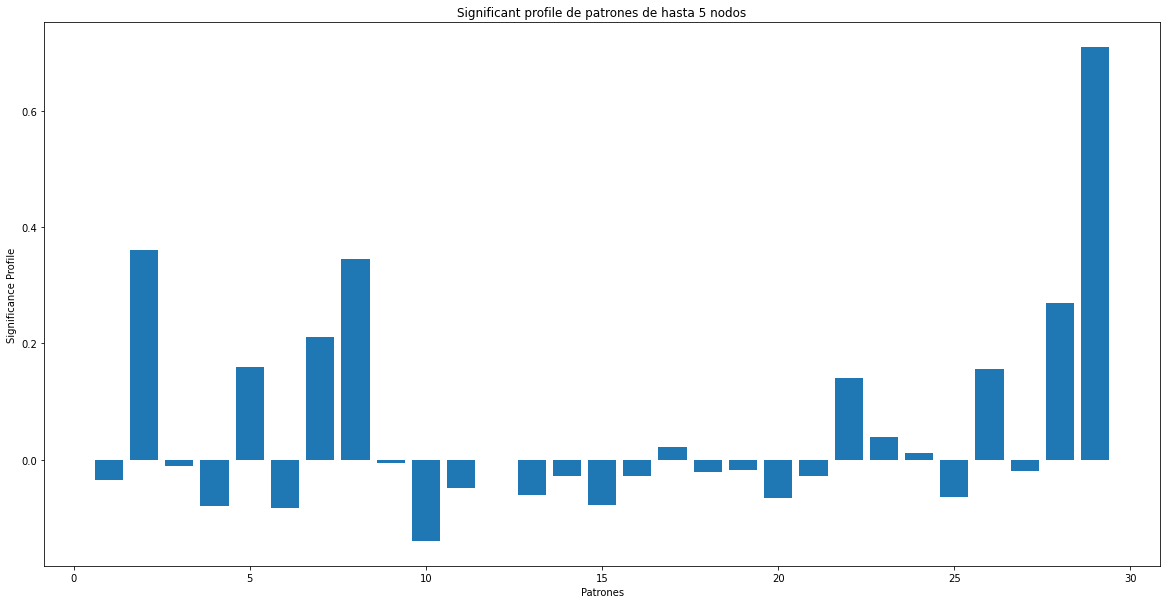

In [17]:
plt.figure(figsize=(20,10))
plt.title(f"Significant profile de patrones de hasta {max(NODOS_MOTIF)} nodos")

plt.bar(range(1, len(sp) + 1), sp)
plt.ylabel("Significance Profile")
plt.xlabel("Patrones")

Lo que podemos ver del gráfico del SP es que casi todos los patrones estan bien representados (ni muy sub ni muy sobre), pero que en particular tenemos algunos muy significantes (o sea, motifs!). Cuáles son?

Top 4 motifs (segun su SP)


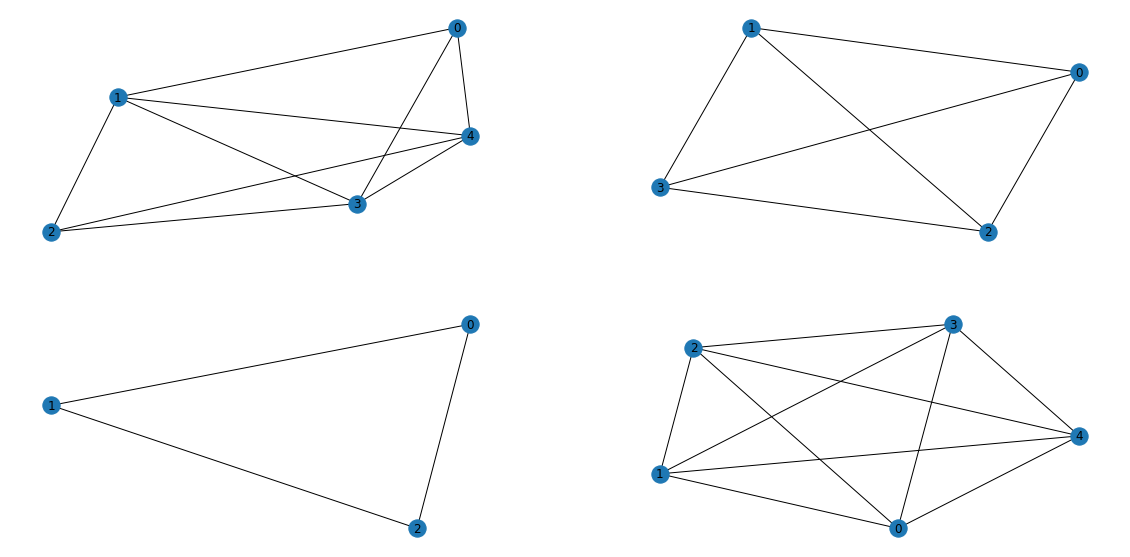

In [18]:
# magia de numpy: https://stackoverflow.com/a/23734295 
indices_top_motifs = np.argpartition(sp, -4)[-4:]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
ax = axes.flatten()

print(f"Top {len(indices_top_motifs)} motifs (segun su SP)")
for i in range(len(ax)):
    subg = motifs[indices_top_motifs[i]]
    nx.draw_networkx(subg, ax=ax[i])
    ax[i].set_axis_off()

plt.show()

Los motifs encontrados son, como ya vimos en otras redes de ejemplo, los más 'completos' (en terminos de cantidades de aristas). El analisis correcto acá sería poder identificar estos motifs acorde al dominio, e intentar ver porque son estos los más representados.

Por ejemplo, en vez de un 'triángulo', intentar pensarlo como tres países con conexiones directas entre sí. Este tipo de analisis es más interesante en un grafo dirigido (poder hablar de 'food chains', 'feedback loops', o distintas ideas).

En este caso, creo yo que lo que pasa es que no tiene mucho sentido tener un aeropuerto enteramente desconectado de la red de vuelos, a menos que sea un aeropuerto chico/un país con pocos vuelos. Entonces terminan siendo todos los grafos bastante fuertemente conexos! Son más predominantes los grafos con vuelos entre 3, 4 o 5 capitales del mundo que los que requieren que sí o sí hagamos una escala.

#### Ejercicio 3

Detectar los roles en dicha red utilizando el algoritmo RolX, explicando el resultado obtenido.

In [19]:
# Ojo, graphrole tiene de dependencia a networkx 2.5, pero los algoritmos copados de comunidades salieron en nx 2.7
# Hay que lograr tener en paralelo nx > 2.7 y graphrole:
# - Asegurarse de estar en py3.9, en vez de py3.10
# - Clonar el repo de graphrole
# - Modificar el requirements.txt del repo clonado para ponerle nx 2.8
# - Hacer `pip install ./GraphRole`

from graphrole import RecursiveFeatureExtractor, RoleExtractor

feature_extractor = RecursiveFeatureExtractor(G)
features = feature_extractor.extract_features()
role_extractor = RoleExtractor(n_roles=None)
role_extractor.extract_role_factors(features)

In [20]:
features.sample(3)

,degree(mean)(mean)(mean),external_edges(mean)(mean)(mean),degree(mean)(mean),external_edges(mean)(mean),degree(mean),external_edges(mean),internal_edges(mean),degree,external_edges,internal_edges
Lesotho,45.637967,896.283928,48.148936,808.851064,47.000000,1316.000000,497.000000,1,46,1
Mali,46.417075,863.327656,44.662551,818.327632,40.210526,795.157895,490.000000,19,517,133
Latvia,52.942156,963.817581,52.892428,1005.051622,61.323529,1009.088235,1017.176471,34,1113,503


In [21]:
roles = {}

for country, role in role_extractor.roles.items():
    roles.setdefault(role, set()).add(country)

print(f"Encontramos {len(roles)} distintos roles")

Encontramos 5 distintos roles


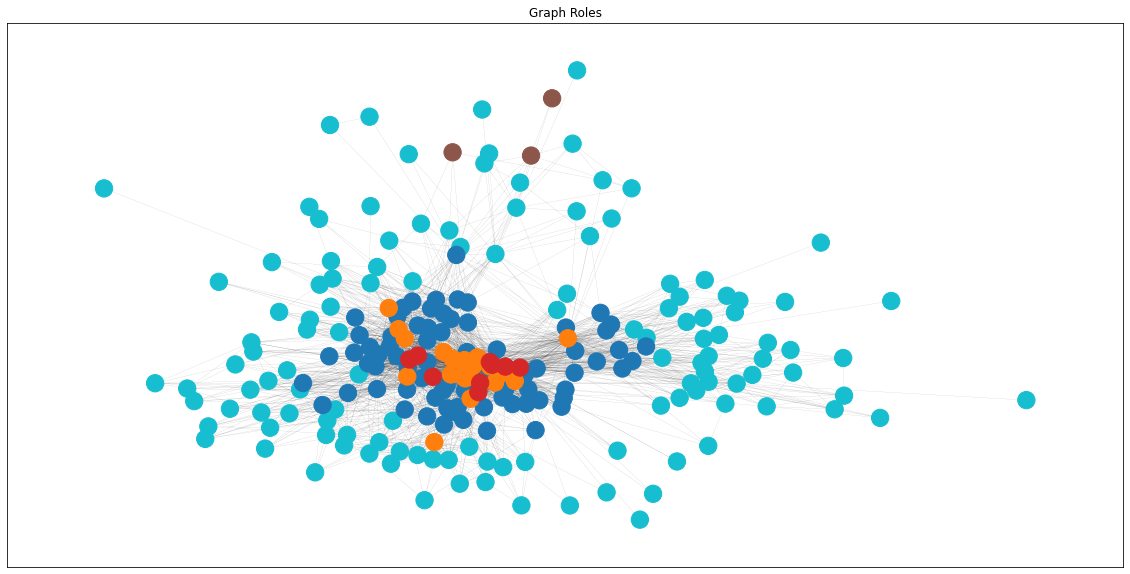

In [22]:
plt.figure(figsize=(20,10))

draw_nodes = {}
colors = random.sample(list(mcolors.TABLEAU_COLORS), len(roles))
for role, color in zip(roles, colors):
    draw_nodes.update({n: color for n in roles[role]})
    
plt.title("Graph Roles")
nx.draw_networkx(G, 
                 nodelist=draw_nodes.keys(), 
                 node_color=list(draw_nodes.values()), 
                 width=0.05, 
                 with_labels=False)

Como podemos ver, `graphrole` (aplicando `RolX`) nos agrupó los nodos de nuestro grafo en distintos roles, basandose en features locales y regionales. Es decir, nos encontró nodos con posiciones similares, pero no necesariamente cercanos entre sí.

Se puede ver que uno de los roles encontrados claramente se refiere a los periféricos de nuestra red, mientras que los otros se refieren a nodos más centrales, como si fuese una cebolla 🧅.